### Tarea 05 
### Procesamiento de lenguaje natural 
#### Giovanni Gamaliel López Padilla

##### Organización de los archivos

```bash
├── Data
│  ├── mex_train.txt
│  ├── mex_train_labels.txt
│  ├── mex_val.txt
│  ├── mex_val_labels.txt
│  ├── word2vec
│  │  └── word2vec_col.txt
│  ├── Model_01
│  │  ├── checkpoint.pt
│  │  ├── model_best.pt
│  │  └── stadistics.csv
│  ├── Model_02
│  │  ├── checkpoint.pt
│  │  ├── model_best.pt
│  │  └── stadistics.csv
│  ├── Model_03
│  │  ├── checkpoint.pt
│  │  ├── model_best.pt
│  │  └── stadistics.csv
│  └── Practica
│     ├── checkpoint.pt
│     ├── model_best.pt
│     └── stadistics.csv
├── Practica05.ipynb
├── Problema_01.ipynb
├── Problema_02.ipynb
├── Problema_03.ipynb
└── Results.ipynb
```

##### Entramiento

En entrenamiento de cada modelo se realizo usando la plataforma Google Colab con el uso de GPU. 

##### Ejeccución de predicciones

Para el calculo de los puntos de cada ejercicios se realizo la lectura del archivo ``model_best.pt`` usando cada notebook de forma local. Por lo que es necesario desactivar el modo GPU si se esta usando la plataforma de Google Colab.

#### Embeddings wod2vec

En el comprimido de ``Data`` no se incluyo la carpeta ``word2vec`` debido al tamaño del archivo. Por lo cual es necesario la descarga de este para el funcionamiento de los notebooks que hagan uso del archivo.

Las perplejidades obtenidas en los diferentes modelos creados se encuentran enlistado en la celda siguiente. En esta se aprecia que el modelo que contempla la información por carácteres produce una mayor perplejidad. En cambio el modelo que llega a producir una menor perplefijdad son los modelos entrenados con una función RELU en la capa oculta de la red neuronal. Aunado a esto, el modelo de Bengio (modelo 3) no tiene una gran diferencia en perplefijdad en comparación al modelo creado en clase.

In [1]:
from tabulate import tabulate
perplexity = [["Practica",42.2133],
              ["Modelo 1",133.8656],
              ["Modelo 2",42.2133 ],
              ["Modelo 3",48.2106 ]]
print(tabulate(perplexity,
              headers=["Modelo",
                      "Perplejidad"]))

Modelo      Perplejidad
--------  -------------
Practica        42.2133
Modelo 1       133.866
Modelo 2        42.2133
Modelo 3        48.2106


Realizando una comparación con los parámetros train accuraccy, loss, validaton accuracy y tiempo en cada epoca se obtuvo la gráfica mostrada en la siguiente celda. En esta se logran apreciar los siguientes puntos:

+ El modelo que contempla los carácteres llega a obtener una mayor train accuracy con respecto a los otros modelos.
+ Todos los modelos tienden a converger en un valor para los diferentes parámetros. Por lo que aumentar el número de epocas en el entrenamiento podria no llegar a una mejora en los valores.
+ Los tiempos de ejecucción en cada epoca parecen ser constantes con algunas variaciones y en con casos excepcionales donde el tiempo aumenta.

Por último, la diferencia entre el modelo realizado en clase (practica, modelo 1, modelo 2) y el modelo de Bengio (modelo 3) es que en la capa oculta se realiza una función relu o una función tangente inversa respectivamente. Esto se puede apreciar en la clase ``neural_language_model`` en la función ``forward``.

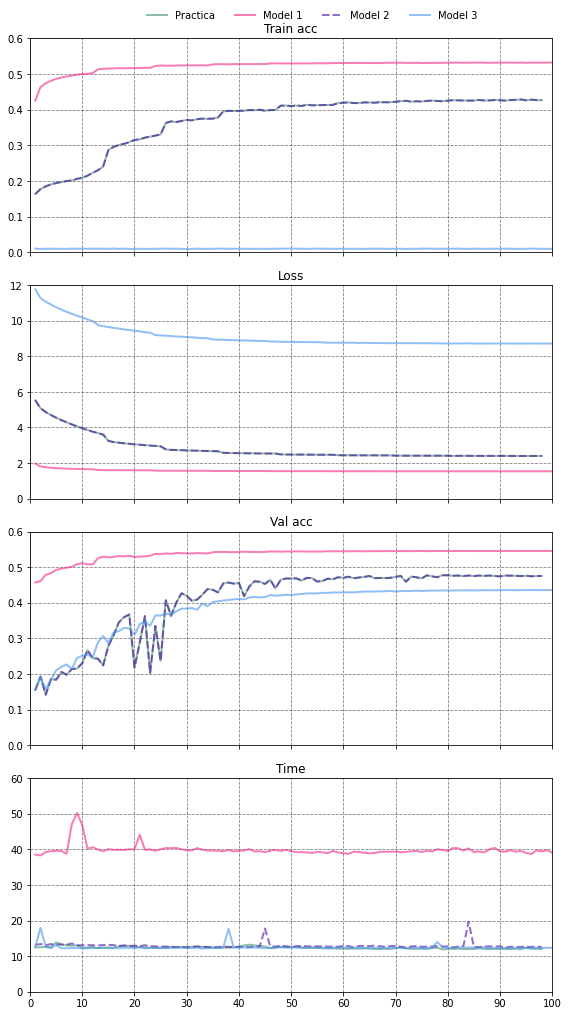

In [2]:
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import linspace
from os.path import join
params = {
    "path data": "Data",
    "file data": "stadistics.csv",
    "headers": {"Train acc": {"y lim": [0, 0.6]},
                "Loss": {"y lim": [0, 12]},
                "Val acc": {"y lim": [0, 0.6]},
                 "Time": {"y lim": [0, 60]}},
    "models": {
        "Practica": {"color": "#40916c",
                     "folder name": "Practica",
                     "ls": "-"},
        "Model 1": {"color": "#f72585",
                    "folder name": "Model_01",
                    "ls": "-"},
        "Model 2": {"color": "#480ca8",
                    "folder name": "Model_02",
                    "ls": "--"},
        "Model 3": {"color": "#4895ef",
                    "folder name": "Model_03",
                    "ls": "-"}
    }
}
fig, axs = plt.subplots(4, 1,
                        figsize=(8, 14),
                        sharex=True)
for model in params["models"]:
    path = params["models"][model]["folder name"]
    filename = join(params["path data"],
                    path,
                    params["file data"])
    data = read_csv(filename,
                    index_col=0)
    color = params["models"][model]["color"]
    for ax, header in zip(axs, params["headers"]):
        dataset = params["headers"][header]
        ls = params["models"][model]["ls"]
        ax.set_title(header)
        ax.plot(data.index,
                data[header],
                color=color,
                label=model,
                lw=2,
                ls=ls,
                alpha=0.6)
        ax.set_xlim(0, 100)
        ax.set_ylim(dataset["y lim"][0],
                    dataset["y lim"][1])
        ax.set_xticks(linspace(0, 100, 11))
        ax.grid(ls="--",
                color="#000000",
                alpha=0.5)
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,
           labels,
           bbox_to_anchor=(0.85, 1.01),
           ncol=4,
           frameon=False)
plt.show()
